# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Tabla de contenido

* [2.1 Cargar los datos](#2.1)
* [2.2 Preparar los datos](#2.2)
* [2.3 Planes](#2.3)
* [2.4 Usuarios](#2.4)
    * [2.4.1 Corregir datos](#2.4.1)
* [2.5 Llamadas](#2.5)
    * [2.5.1 Corregir datos](#2.5.1)
    * [2.5.2 Enriquecer datos](#2.5.2)
* [2.6 Mensajes](#2.6)
    * [2.6.1 Corregir datos](#2.6.1)
    * [2.6.2 Enriquecer datos](#2.6.2)
*[2.7 Internet](#2.7)
    * [2.7.1 Corregir datos](#2.7.1)
    * [2.7.2 Enriquecer datos](#2.7.2)
* [2.8 Estudiar las condiciones del plan](#2.8)
* [2.9 Agregar datos por usuario](#2.9)
* [2.10 Estudia el comportamiento del usuario](#2.10)
    * [2.10.1 Llamadas](#2.10.1)
    * [2.10.2 Mensajes](#2.10.2)
    * [2.10.3 Internet](#2.10.3)
*[2.11 Ingreso](#2.11)
*[2.12 Probar las hipótesis estadísticas](#2.12)
*[2.13 Conclusión general](#2.13)


## Cargar los datos

In [77]:
# Cargamos todas las librerías

import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargamos los archivos de datos en diferentes DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")
users = pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

## Planes

In [3]:
# Imprimos la información general de Planes

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Mostramos un resumen sobre el DataFrame de Planes

plans.describe()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Imprimimos una muestra de los datos de Planes

plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El dataframe de Planes muestra solo información, por ende no se le preprocesará. No es necesario corregir los datos ni enriquecerlos.

## Usuarios

In [6]:
# Imprimos la información general de Usuarios

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Mostramos un resumen sobre el DataFrame de Usuarios

users.describe()


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Imprimimos una muestra de los datos de Usuarios

users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Podemos visualizar que las columnas 'reg_date' y 'churn_date' tienen formato object, procederemos a cambiarlas a formato datetime.

### Corregir datos

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Llamadas

In [10]:
# Imprimos la información general de Llamadas

calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Mostramos un resumen sobre el DataFrame de Llamadas

calls.describe()


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
# Imprimimos una muestra de los datos de Llamadas

calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Podemos visualizar que la columna 'call_date' tiene formato objetc, procederemos cambiarla a formate datetime.

### Corregir datos

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer datos

Para estudiar mejor este Dataframe, vamos a anexarle las columnas 'month', 'year' y 'year_month'. Todos estos datos provienen de la columna 'call_date'. Posteriormente, eliminaremos todas las entradas en la columna 'duration' que tengan un valor 0.0, para efectos de un mejor estudio.

In [14]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year                    
calls['year_month'] = calls['year'].astype('str') + '_' + calls['month'].astype('str')

calls.head()


,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018_12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018_12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018_12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018_12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018_12


In [15]:
calls[calls['duration'] == 0.0]


,id,user_id,call_date,duration,month,year,year_month
19,1001_4,1001,2018-12-05,0.0,12,2018,2018_12
25,1001_13,1001,2018-12-24,0.0,12,2018,2018_12
31,1001_30,1001,2018-10-17,0.0,10,2018,2018_10
32,1001_31,1001,2018-11-03,0.0,11,2018,2018_11
34,1001_35,1001,2018-12-21,0.0,12,2018,2018_12
...,...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11,2018,2018_11
137715,1499_184,1499,2018-09-15,0.0,9,2018,2018_9
137720,1499_189,1499,2018-12-27,0.0,12,2018,2018_12
137722,1499_191,1499,2018-12-24,0.0,12,2018,2018_12


In [16]:
calls = calls.query('duration != 0.0')

calls[calls['duration'] == 0.0]


,id,user_id,call_date,duration,month,year,year_month


In [17]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

calls.head()


,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,9,12,2018,2018_12
1,1000_145,1000,2018-12-27,14,12,2018,2018_12
2,1000_247,1000,2018-12-27,15,12,2018,2018_12
3,1000_309,1000,2018-12-28,6,12,2018,2018_12
4,1000_380,1000,2018-12-30,5,12,2018,2018_12


In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  int64         
 4   month       110901 non-null  int64         
 5   year        110901 non-null  int64         
 6   year_month  110901 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.8+ MB


## Mensajes

In [19]:
# Imprimos la información general de Mensajes

messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Mostramos un resumen sobre el DataFrame de Mensajes

messages.describe()


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [21]:
# Imprimimos una muestra de los datos de Mensajes

messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Podemos visualizar que la columna 'message_date' tiene formato object, procederemos a cambiarle el formato a datetime.

### Corregir datos

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer datos

Vamos a anexar las columnas 'month', 'year' y 'year_month' con los datos de la columna 'message_date' para efectos de un mejor estudio.

In [23]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year                    
messages['year_month'] = messages['year'].astype('str') + '_' + messages['month'].astype('str')
messages.head()

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018_12
1,1000_160,1000,2018-12-31,12,2018,2018_12
2,1000_223,1000,2018-12-31,12,2018,2018_12
3,1000_251,1000,2018-12-27,12,2018,2018_12
4,1000_255,1000,2018-12-26,12,2018,2018_12


## Internet

In [24]:
# Imprimos la información general de Internet

internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Mostramos un resumen sobre el DataFrame de Planes

internet.describe()


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [26]:
# Imprimimos una muestra de los datos de Planes

internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 Podemos visualizar que la columna 'session_date' tiene formato object, procederemos a cambiarle el formato a datetime.

### Corregir datos

In [27]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer datos

Vamos a anexar las columnas 'month', 'year' y 'year_month' con los datos de la columna 'session_date' para efectos de un mejor estudio.

In [28]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year                    
internet['year_month'] = internet['year'].astype('str') + '_' + internet['month'].astype('str')
internet.head()

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018_12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018_12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018_12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018_12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018_12


## Estudiar las condiciones del plan

Vamos a mostrar nuevamente la información de los dataframes plans y calls.

In [29]:
# Imprimimos las condiciones de Plan

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [30]:
# Imprimimos las condiciones de Llamada

calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  int64         
 4   month       110901 non-null  int64         
 5   year        110901 non-null  int64         
 6   year_month  110901 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.8+ MB


## Agregar datos por usuario

Procederemos a realizar cuatro tablas pivote para mostrar información mensual de los usuarios sobre:

1) Número de llamadas.
2) Cantidad de minutos.
3) Cantidad de mensajes enviados.
4) Volúmen de tráfico.

In [31]:
# Calculamos el número de llamadas hechas por cada usuario por mes. 

calls_user_month = calls.pivot_table(index = ['user_id', 'month'],
                                     values = 'duration', 
                                     aggfunc = 'count')

calls_user_month = calls_user_month.reset_index()

calls_user_month.columns = ['user_id', 'month', 'num_call']

calls_user_month


,user_id,month,num_call
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [32]:
# Calculamos la cantidad de minutos que usó cada usuario por mes. 

minutes_user_month = calls.pivot_table(index = ['user_id', 'month'],
                                 values = 'duration',
                                 aggfunc = 'sum')

minutes_user_month = minutes_user_month.reset_index()

minutes_user_month.columns = ['user_id', 'month', 'minutes_call']

minutes_user_month



,user_id,month,minutes_call
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2251,1498,12,339
2252,1499,9,346
2253,1499,10,385
2254,1499,11,308


In [33]:
# Calculamos el número de mensajes enviados por cada usuario por mes. 

messages_user_month = messages.pivot_table(index = ['user_id', 'month'], 
                                  values = 'message_date', 
                                  aggfunc= 'count')

messages_user_month = messages_user_month.reset_index()

messages_user_month.columns = ['user_id', 'month', 'num_message']

messages_user_month

,user_id,month,num_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [34]:
# Calculamos el volumen del trafico de internet usado por cada usuario por mes. 

internet_volume_user_month = internet.pivot_table(index = ['user_id', 'month'], 
                                  values = 'mb_used', 
                                  aggfunc= 'sum')

internet_volume_user_month = internet_volume_user_month.reset_index()

internet_volume_user_month.columns = ['user_id', 'month', 'gb_used']

internet_volume_user_month

,user_id,month,gb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [35]:
# Llevamos los megas a gigas

internet_volume_user_month['gb_used'] = np.ceil(internet_volume_user_month['gb_used']/1024)
internet_volume_user_month


,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


Todos estos datos mostrados, los vamos a utilizar y procederemos a combinarlos en un nuevo Dataframe llamado df.

In [36]:
# Combinamos los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

df = calls_user_month.merge(minutes_user_month, on = ['user_id', 'month'], how = 'outer')

df = df.merge(messages_user_month, on = ['user_id', 'month'], how = 'outer')

df = df.merge(internet_volume_user_month, on = ['user_id', 'month'], how = 'outer') 

df

,user_id,month,num_call,minutes_call,num_message,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,22.0,182.0,30.0,7.0
2,1001,9,38.0,315.0,44.0,14.0
3,1001,10,47.0,393.0,53.0,22.0
4,1001,11,49.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0
2289,1482,10,NaN,NaN,2.0,NaN
2290,1094,10,NaN,NaN,NaN,2.0
2291,1108,12,NaN,NaN,NaN,1.0


In [37]:
# Añade la información del plan

df = df.merge(users, on = 'user_id', how = 'left')

df

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
2289,1482,10,NaN,NaN,2.0,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT
2290,1094,10,NaN,NaN,NaN,2.0,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12
2291,1108,12,NaN,NaN,NaN,1.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaT


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   num_call      2256 non-null   float64       
 3   minutes_call  2256 non-null   float64       
 4   num_message   1806 non-null   float64       
 5   gb_used       2277 non-null   float64       
 6   first_name    2293 non-null   object        
 7   last_name     2293 non-null   object        
 8   age           2293 non-null   int64         
 9   city          2293 non-null   object        
 10  reg_date      2293 non-null   datetime64[ns]
 11  plan          2293 non-null   object        
 12  churn_date    158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 250.8+ KB


Podemos visualizar que hay columnas con valores ausentes, procederemos a solucionarlo

In [39]:
# Resolvemos los valores ausentes

for i in ('num_call', 'minutes_call', 'num_message', 'gb_used'):
    df[i] = df[i].fillna(0)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   num_call      2293 non-null   float64       
 3   minutes_call  2293 non-null   float64       
 4   num_message   2293 non-null   float64       
 5   gb_used       2293 non-null   float64       
 6   first_name    2293 non-null   object        
 7   last_name     2293 non-null   object        
 8   age           2293 non-null   int64         
 9   city          2293 non-null   object        
 10  reg_date      2293 non-null   datetime64[ns]
 11  plan          2293 non-null   object        
 12  churn_date    158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 250.8+ KB


In [40]:
#Revisamos nuevamente el dataframe de Planes

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Procederemos a calcular el ingreso mensual por cada usuario, teniendo en cuenta las columnas del Dataframe Planes 

In [41]:
# Calculamos el ingreso mensual para cada usuario

def income(row):
    messages = row['num_message']
    duration = row['minutes_call']
    gb = row['gb_used']
    plan = row['plan']
    
    package_limit = 0
    message_limit = 0
    internet_limit = 0
    calls_limit = 0

    if plan == 'surf':
        pack_cost = 20
        if duration > 500:
            calls_limit = (duration - 500) * 0.3
        if messages > 50:
            message_limit = (messages - 50) * 0.3
        if gb > 15:
            internet_limit = (gb -15) * 10
    
    elif plan == 'ultimate':
        pack_cost = 70
        if duration > 3000:
            calls_limit = (duration - 3000) * 0.1
        if messages > 1000:
            message_limit = (messages - 1000) * 0.1
        if gb > 30:
            internet_limit = (gb - 30) * 0.1
            
    total = pack_cost + calls_limit + message_limit + internet_limit

    return total
    
    

In [42]:
# Aplicamos la fórmula y mostramos el Dataframe actualizado con la nueva columna 'income'

df['income'] = df.apply(income, axis = 1)

df.head()


,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.0
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,90.9
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0


## Estudia el comportamiento del usuario

In [43]:
# Creamos dos nuevos Dataframes filtrados por el tipo de plan.

df_surf = df.query('plan == "surf"')
df_ultimate = df.query('plan == "ultimate"')

df_surf.info()

df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2290
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       1573 non-null   int64         
 1   month         1573 non-null   int64         
 2   num_call      1573 non-null   float64       
 3   minutes_call  1573 non-null   float64       
 4   num_message   1573 non-null   float64       
 5   gb_used       1573 non-null   float64       
 6   first_name    1573 non-null   object        
 7   last_name     1573 non-null   object        
 8   age           1573 non-null   int64         
 9   city          1573 non-null   object        
 10  reg_date      1573 non-null   datetime64[ns]
 11  plan          1573 non-null   object        
 12  churn_date    106 non-null    datetime64[ns]
 13  income        1573 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 184.3+ KB
<class 'pa

### Llamadas

In [44]:
# Comparamos la duración promedio de llamadas por cada plan por cada mes. 

table_call_duration = df.pivot_table(index = ['plan', 'month'], values='minutes_call', aggfunc='mean').reset_index()

table_call_duration


,plan,month,minutes_call
0,surf,1,203.000000
1,surf,2,297.000000
2,surf,3,330.000000
3,surf,4,351.540000
4,surf,5,399.584416
5,surf,6,431.298969
6,surf,7,449.983471
7,surf,8,410.111111
8,surf,9,414.226804
9,surf,10,429.729958


In [45]:
# Definimos una función para mostrar el gráfico de barras

sns.set()

def barplot (a, b, c, d):
    plt.figure(figsize=(12,6))
    sns.barplot(x='month', y=b, hue='plan', data=a)
    plt.xlabel('Meses')
    plt.ylabel(c)
    plt.title(d)
    plt.show()

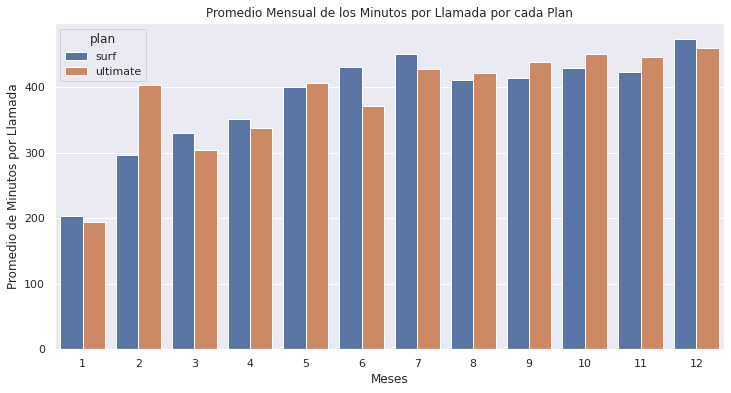

In [46]:
# Mostramos el gráfico de barras.

barplot(table_call_duration, 'minutes_call', 'Promedio de Minutos por Llamada', 'Promedio Mensual de los Minutos por Llamada por cada Plan')

In [47]:
# Definimos una función para mostrar los histogramas

def hisplot (a, b, c):
    plt.figure(figsize = (8,5))
    sns.histplot(a[b], bins = 70, kde = True)
    plt.xlabel(b)
    plt.ylabel('Usuarios')
    plt.title(c)
    plt.show()


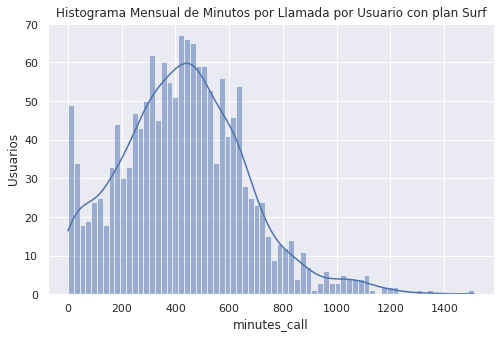

In [48]:
# Mostrramos el histograma mensual de la duración de llamadas para los usuarios del plan Surf

hisplot(df_surf, 'minutes_call', 'Histograma Mensual de Minutos por Llamada por Usuario con plan Surf')

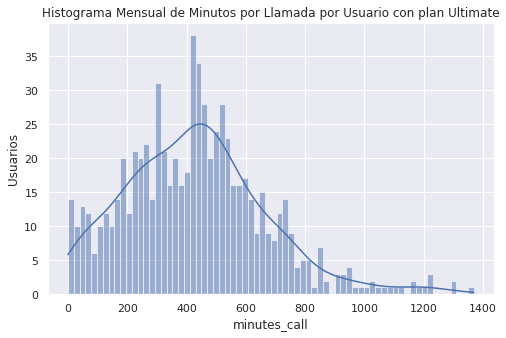

In [49]:
# Mostramos el histograma mensual de la duración de llamadas para los usuarios del plan Ultimate

hisplot(df_ultimate, 'minutes_call', 'Histograma Mensual de Minutos por Llamada por Usuario con plan Ultimate')

In [50]:
# Calculamos el promedio, la varianza y la desviación estándar de la duración mensual de llamadas del plan Surf

promedio_mensual_call_duration_surf = df_surf['minutes_call'].mean()
print('Promedio de la Duración de las Llamadas del Plan Surf:', round(promedio_mensual_call_duration_surf,2))

var_mensual_call_duration_surf = np.var(df_surf['minutes_call'])
print('Varianza de la Duración de las Llamadas del Plan Surf:', round(var_mensual_call_duration_surf,2))

std_mensual_call_duration_surf = np.sqrt(var_mensual_call_duration_surf)
print('Desviación Estándar de la Duración de las Llamadas del Plan Surf:', round(std_mensual_call_duration_surf,2))

Promedio de la Duración de las Llamadas del Plan Surf: 428.75
Varianza de la Duración de las Llamadas del Plan Surf: 54933.33
Desviación Estándar de la Duración de las Llamadas del Plan Surf: 234.38


In [51]:
# Calculamos la media y la varianza de la duración mensual de llamadas del plan Ultimate

promedio_mensual_call_duration_ultimate = df_ultimate['minutes_call'].mean()
print('Promedio de la Duración de las Llamadas del Plan Ultimate:', round(promedio_mensual_call_duration_ultimate,2))

var_mensual_call_duration_ultimate = np.var(df_ultimate['minutes_call'])
print('Varianza de la Duración de las Llamadas del Plan Ultimate:', round(var_mensual_call_duration_ultimate,2))

std_mensual_call_duration_ultimate = np.sqrt(var_mensual_call_duration_ultimate)
print('Desviación Estándar de la Duración de las Llamadas del Plan Ultimate:', round(std_mensual_call_duration_ultimate,2))

Promedio de la Duración de las Llamadas del Plan Ultimate: 430.45
Varianza de la Duración de las Llamadas del Plan Ultimate: 57764.13
Desviación Estándar de la Duración de las Llamadas del Plan Ultimate: 240.34


<AxesSubplot:title={'center':'minutes_call'}, xlabel='month'>

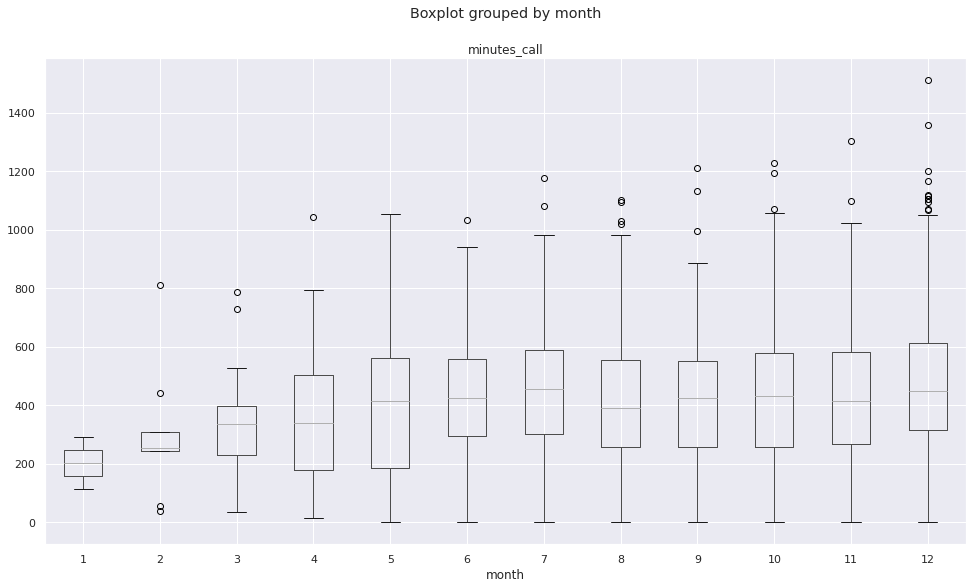

In [52]:
# Mostramos el diagrama de caja mensual de la duración de llamadas para los usuarios del plan Surf por mes

df_surf.boxplot(by= 'month', column= 'minutes_call', figsize= (16, 9))

<AxesSubplot:title={'center':'minutes_call'}, xlabel='month'>

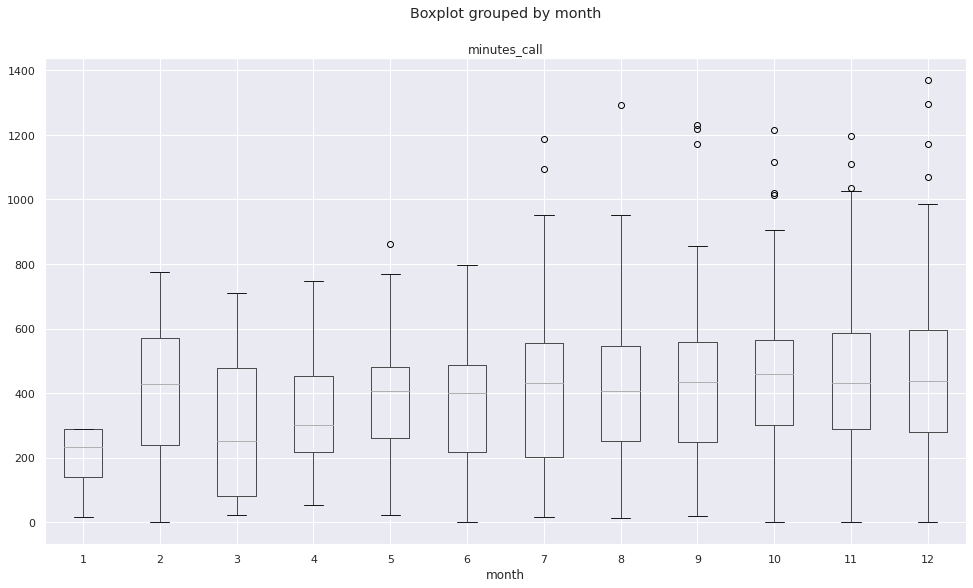

In [53]:
# Mostramos el diagrama de caja mensual de la duración de llamadas para los usuarios del plan Ultimate

df_ultimate.boxplot(by= 'month', column= 'minutes_call', figsize= (16, 9))

Se pudo visualizar que:

a. Hay valores atípicos en los dos planes cuando los usuarios usaron más de 1.000 minutos llamando.

b. En ambos planes, la mayoría de los usuarios gastaron entre 200 y 600 minutos al mes.

### Mensajes

In [54]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

table_message_sent = df.pivot_table(index=['plan', 'month'], values='num_message', aggfunc='median').reset_index()

table_message_sent

,plan,month,num_message
0,surf,1,10.5
1,surf,2,3.0
2,surf,3,7.0
3,surf,4,10.0
4,surf,5,15.0
5,surf,6,15.0
6,surf,7,20.0
7,surf,8,20.0
8,surf,9,22.5
9,surf,10,26.0


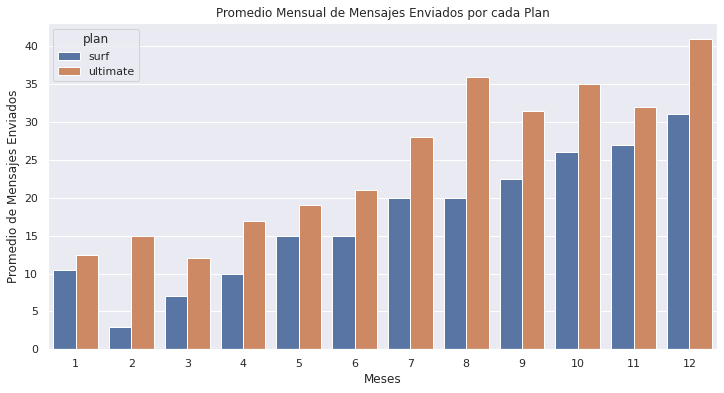

In [55]:
# Mostramos el gráfico de barras 

barplot(table_message_sent, 'num_message', 'Promedio de Mensajes Enviados', 'Promedio Mensual de Mensajes Enviados por cada Plan')


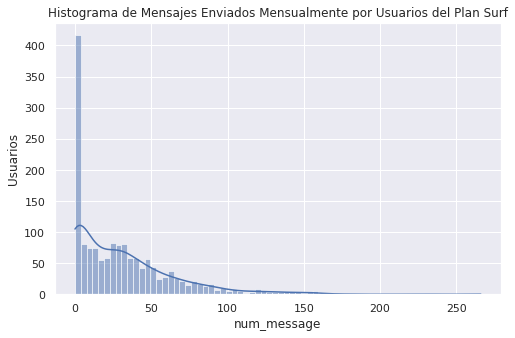

In [56]:
# Mostramos el histograma de los mensajes enviados mensualmente por usuarios del plan Surf

hisplot(df_surf, 'num_message', 'Histograma de Mensajes Enviados Mensualmente por Usuarios del Plan Surf')


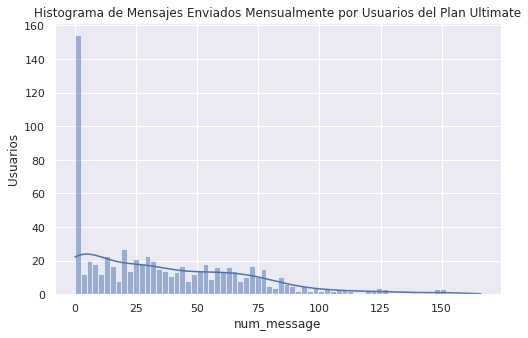

In [57]:
# Mostramos el histograma de los mensajes enviados mensualmente por usuarios del plan Ultimate

hisplot(df_ultimate, 'num_message', 'Histograma de Mensajes Enviados Mensualmente por Usuarios del Plan Ultimate')

In [58]:
# Calculamos el promedio, la varianza y la desviación estándar de los mensajes enviados mensualmente del plan Surf

promedio_mensual_sent_message_surf = df_surf['num_message'].mean()
print('Promedio de Mensajes Enviados por el Plan Surf:', round(promedio_mensual_sent_message_surf,2))

var_monthly_sent_message_surf = np.var(df_surf['num_message'])
print('Varianza de Mensajes Enviados por el Plan Surf:', round(var_monthly_sent_message_surf,2))

std_monthly_sent_message_surf = np.sqrt(var_monthly_sent_message_surf)
print('Desviación Estándar de Mensajes Enviados por el Plan Surf:', round(std_monthly_sent_message_surf,2))


Promedio de Mensajes Enviados por el Plan Surf: 31.16
Varianza de Mensajes Enviados por el Plan Surf: 1126.01
Desviación Estándar de Mensajes Enviados por el Plan Surf: 33.56


In [59]:
# Calculamos el promedio, la varianza y la desviación estándar de los mensajes enviados mensualmente del plan Ultimate

promedio_mensual_sent_message_ultimate = df_ultimate['num_message'].mean()
print('Promedio de Mensajes Enviados por el Plan Ultimate:', round(promedio_mensual_sent_message_ultimate,2))

var_monthly_sent_message_ultimate = np.var(df_ultimate['num_message'])
print('Varianza de Mensajes Enviados por el Plan Ultimate:', round(var_monthly_sent_message_ultimate,2))

std_monthly_sent_message_ultimate = np.sqrt(var_monthly_sent_message_ultimate)
print('Desviación Estándar de Mensajes Enviados por el Plan Ultimate:', round(std_monthly_sent_message_ultimate,2))


Promedio de Mensajes Enviados por el Plan Ultimate: 37.55
Varianza de Mensajes Enviados por el Plan Ultimate: 1207.08
Desviación Estándar de Mensajes Enviados por el Plan Ultimate: 34.74


<AxesSubplot:title={'center':'num_message'}, xlabel='month'>

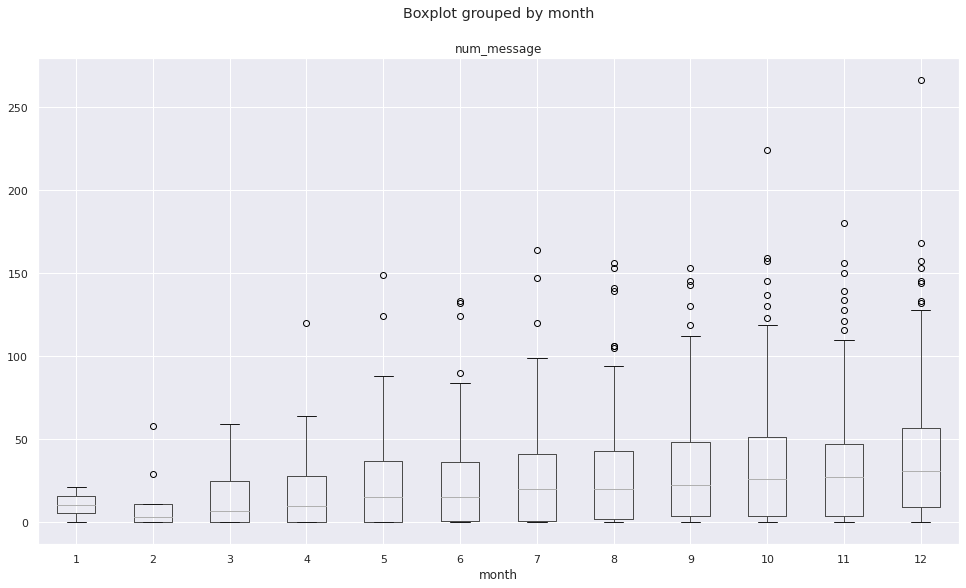

In [60]:
# Mostramos el diagrama de caja mensual de los mensajes enviados por los usuarios del plan Surf por mes

df_surf.boxplot(by= 'month', column= 'num_message', figsize= (16, 9))

<AxesSubplot:title={'center':'num_message'}, xlabel='month'>

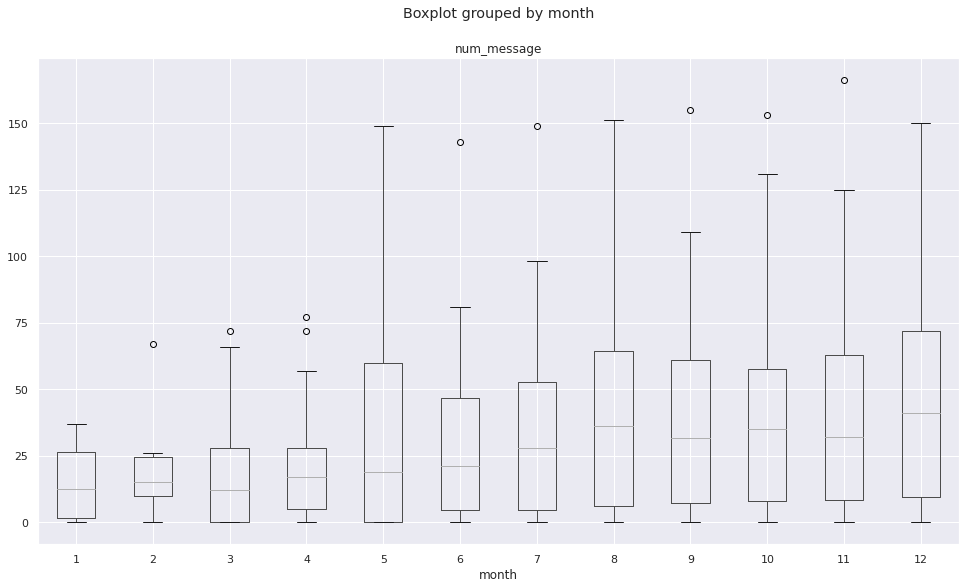

In [61]:
# Mostramos el diagrama de caja mensual de los mensajes enviados por los usuarios del plan Ultimate por mes

df_ultimate.boxplot(by= 'month', column= 'num_message', figsize= (16, 9))

Se puede visualizar que:

a. Los usuarios del plan Ultimate envían más mensajes que los del plan Surf.

b. Despues de 125 mensajes enviados por los usuarios de cada plan, se ven valores atípicos.

### Internet

In [62]:
# Comparamos la cantidad de tráfico de internet consumido por usuarios por plan

table_data_used = df.pivot_table(index=['plan', 'month'], values='gb_used', aggfunc='median').reset_index()
table_data_used


,plan,month,gb_used
0,surf,1,5.0
1,surf,2,12.0
2,surf,3,14.0
3,surf,4,12.0
4,surf,5,14.0
5,surf,6,16.0
6,surf,7,17.0
7,surf,8,17.0
8,surf,9,17.0
9,surf,10,18.0


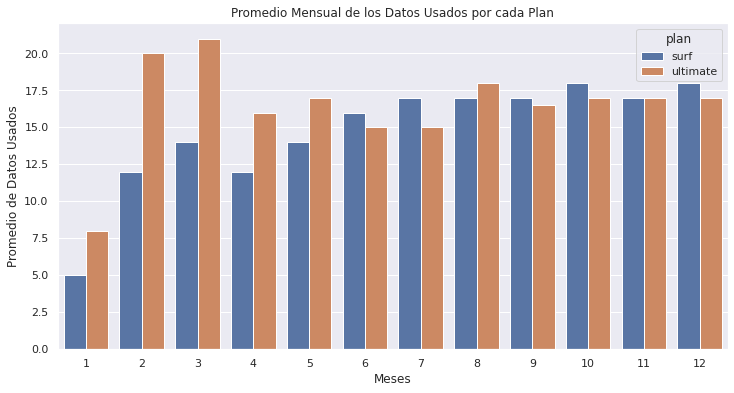

In [63]:
# Mostramos el gráfico de barras

barplot(table_data_used, 'gb_used', 'Promedio de Datos Usados', 'Promedio Mensual de los Datos Usados por cada Plan')


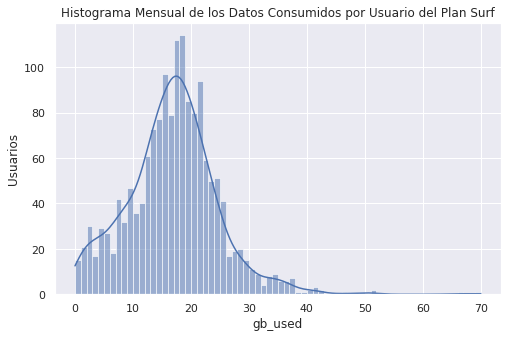

In [64]:
# Mostramos el histograma mensual de los datos consumidos por usuario del plan Surf

hisplot(df_surf, 'gb_used', 'Histograma Mensual de los Datos Consumidos por Usuario del Plan Surf')


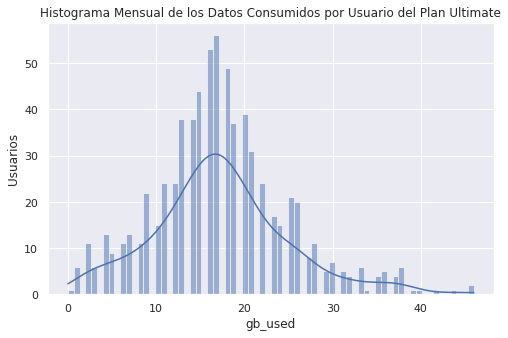

In [65]:
# Mostramos el histograma mensual de los datos consumidos por usuario del plan Ultimate

hisplot(df_ultimate, 'gb_used', 'Histograma Mensual de los Datos Consumidos por Usuario del Plan Ultimate')


In [66]:
# Calculamos el promedio, la varianza y la desviación estándar de los datos usados mensualmente por el plan Surf

avg_monthly_data_used_surf = df_surf['gb_used'].mean()
print('Promedio de los Datos Usados por el Plan Surf:', round(avg_monthly_data_used_surf,2))

var_monthly_data_used_surf = np.var(df_surf['gb_used'])
print('Varianza de los Datos Usados por el Plan Surf:', round(var_monthly_data_used_surf,2))

std_monthly_data_used_surf = np.sqrt(var_monthly_data_used_surf)
print('Desviación Estándar de los Datos Usados por el Plan Surf:', round(std_monthly_data_used_surf,2))


Promedio de los Datos Usados por el Plan Surf: 16.67
Varianza de los Datos Usados por el Plan Surf: 61.54
Desviación Estándar de los Datos Usados por el Plan Surf: 7.85


In [67]:
# Calculamos el promedio, la varianza y la desviación estándar de los datos usados mensualmente por el plan Ultimate 

avg_monthly_data_used_ultimate = df_ultimate['gb_used'].mean()
print('Promedio de los Datos Usados por el Plan Ultimate:', round(avg_monthly_data_used_ultimate,2))

var_monthly_data_used_ultimate = np.var(df_ultimate['gb_used'])
print('Varianza de los Datos Usados por el Plan Ultimate:', round(var_monthly_data_used_ultimate,2))

std_monthly_data_used_ultimate = np.sqrt(var_monthly_data_used_ultimate)
print('Desviación Estándar de los Datos Usados por el Plan Ultimate:', round(std_monthly_data_used_ultimate,2))


Promedio de los Datos Usados por el Plan Ultimate: 17.31
Varianza de los Datos Usados por el Plan Ultimate: 58.75
Desviación Estándar de los Datos Usados por el Plan Ultimate: 7.66


<AxesSubplot:title={'center':'gb_used'}, xlabel='month'>

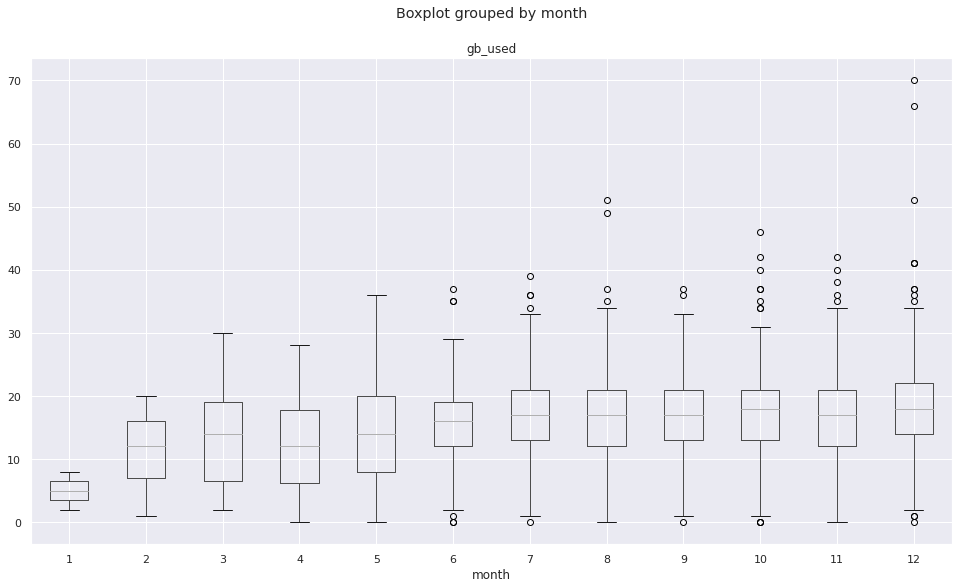

In [68]:
# Mostramos el diagrama de caja de los datos usados por los usuarios del plan Surf por mes

df_surf.boxplot(by= 'month', column= 'gb_used', figsize= (16, 9))


<AxesSubplot:title={'center':'gb_used'}, xlabel='month'>

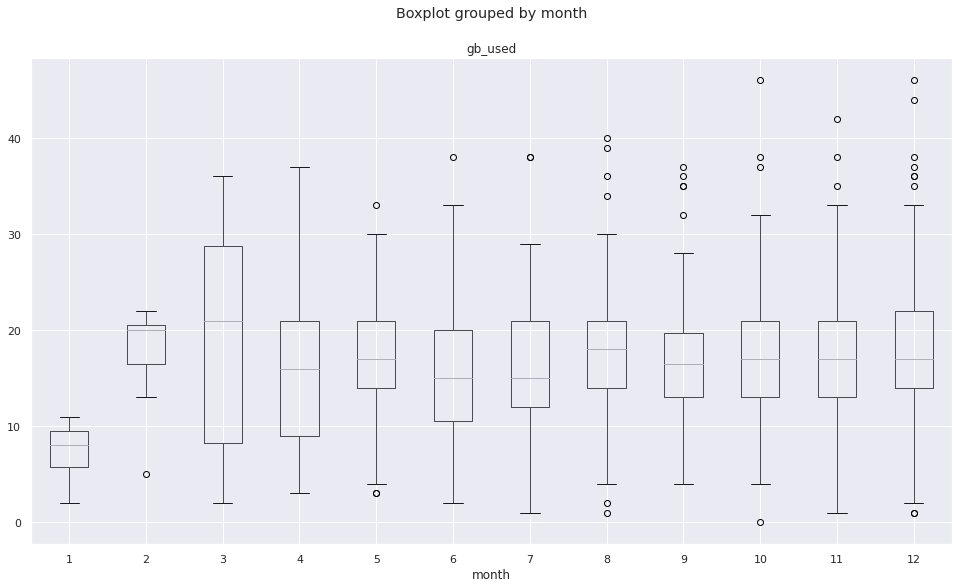

In [69]:
# Mostramos el diagrama de caja de los datos usados por los usuarios del plan Ultimate por mes

df_ultimate.boxplot(by= 'month', column= 'gb_used', figsize= (16, 9))

Se visualizan valores atípicos cuando los usuarios consumen más de 30 gbs.

La mayoría de los usuarios usan entre 10 gb y 20 gb al mes.

## Ingreso

In [70]:
table_income = df.pivot_table(index=['plan', 'month'], values='income', aggfunc='mean').reset_index()
table_income

,plan,month,income
0,surf,1,20.000000
1,surf,2,43.966667
2,surf,3,52.456522
3,surf,4,50.706000
4,surf,5,63.684416
5,surf,6,65.030928
6,surf,7,83.765289
7,surf,8,80.422840
8,surf,9,72.869588
9,surf,10,83.832489


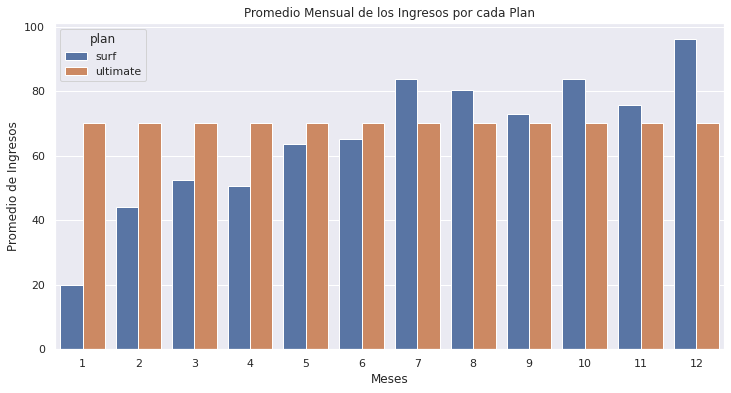

In [71]:
# Mostramos el gráfico de barras

barplot(table_income, 'income', 'Promedio de Ingresos', 'Promedio Mensual de los Ingresos por cada Plan')

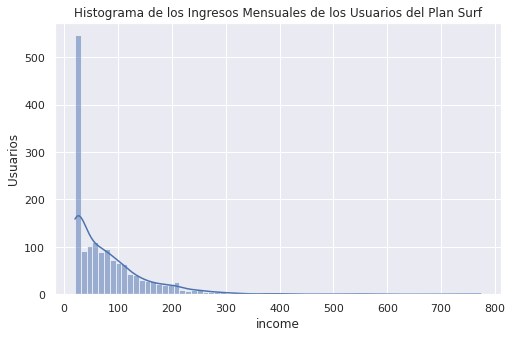

In [72]:
# Mostramos el histograma de los ingresos mensuales de los usuarios del plan Surf

hisplot(df_surf, 'income', 'Histograma de los Ingresos Mensuales de los Usuarios del Plan Surf')


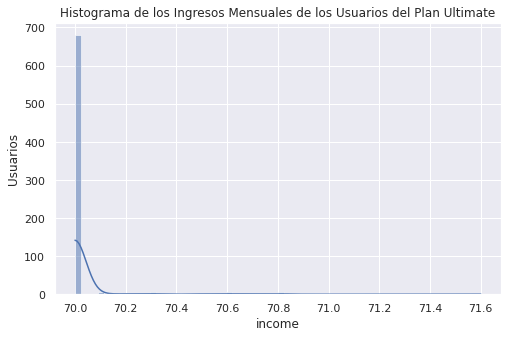

In [73]:
# Mostramos el histograma de los ingresos mensuales de los usuarios del plan Ultimate

hisplot(df_ultimate, 'income', 'Histograma de los Ingresos Mensuales de los Usuarios del Plan Ultimate')


In [74]:
# Calculamos el promedio, la varianza y la desviación estándar del ingreso mensual del plan Surf

avg_monthly_revenue_surf = df_surf['income'].mean()
print('Promedio del Ingreso Mensual del Plan Surf:', round(avg_monthly_revenue_surf,2))

var_monthly_revenue_surf = np.var(df_surf['income'])
print('Varianza del Ingreso Mensual del Plan Surf:', round(var_monthly_revenue_surf,2))

std_monthly_revenue_surf = np.sqrt(var_monthly_revenue_surf)
print('Desviación Estándar del Ingreso Mensual del Plan Surf:', round(std_monthly_revenue_surf,2))


Promedio del Ingreso Mensual del Plan Surf: 79.19
Varianza del Ingreso Mensual del Plan Surf: 5393.39
Desviación Estándar del Ingreso Mensual del Plan Surf: 73.44


In [75]:
# Calculamos el promedio, la varianza y la desviación estándar del ingreso mensual del plan Ultimate

avg_monthly_revenue_ultimate = df_ultimate['income'].mean()
print('Promedio del Ingreso Mensual del Plan Ultimate:', round(avg_monthly_revenue_ultimate,2))

var_monthly_revenue_ultimate = np.var(df_ultimate['income'])
print('Varianza del Ingreso Mensual del Plan Ultimate:', round(var_monthly_revenue_ultimate,2))

std_monthly_revenue_ultimate = np.sqrt(var_monthly_revenue_ultimate)
print('Desviación Estándar del Ingreso Mensual del Plan Ultimate:', round(std_monthly_revenue_ultimate,2))


Promedio del Ingreso Mensual del Plan Ultimate: 70.03
Varianza del Ingreso Mensual del Plan Ultimate: 0.03
Desviación Estándar del Ingreso Mensual del Plan Ultimate: 0.16


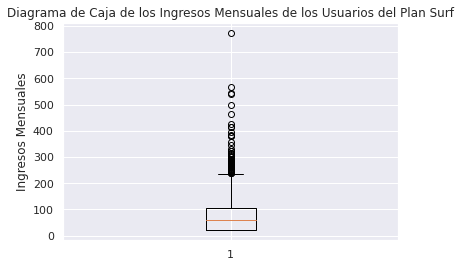

In [85]:
# Mostramos el diagrama de caja de los ingresos mensuales de los usuarios del plan Surf

plt.boxplot(df_surf['income'])
plt.title('Diagrama de Caja de los Ingresos Mensuales de los Usuarios del Plan Surf')
plt.ylabel('Ingresos Mensuales')
plt.show()


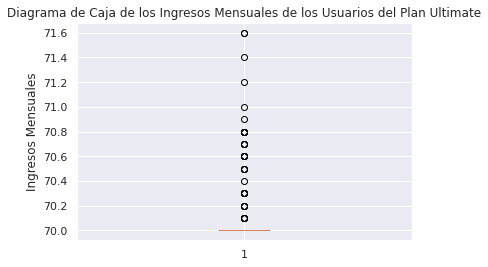

In [86]:
# Mostramos el diagrama de caja de los ingresos mensuales de los usuarios del plan Ultimate

plt.boxplot(df_ultimate['income'])
plt.title('Diagrama de Caja de los Ingresos Mensuales de los Usuarios del Plan Ultimate')
plt.ylabel('Ingresos Mensuales')
plt.show()


Podemos observar que se muestran valores atípicos cuando:

a. Cuando el usuario del plan Surf gasta más de 200 al mes.

b. Cuando el usuario del plan Ultimate gasta más de 70 en un mes.


## Probar las hipótesis estadísticas.

### Probar la hipótesis del ingreso promedio de los usuarios de los planes Surf y Ultimate

Ho: Los ingresos promedios de los usuarios de los planes Surf y Ultimate no son diferentes.

H1: Los ingresos promedios de los usuarios de los planes Surf y Ultimate son diferentes.

Valor alpha = 0.05

Cabe destacar que para determinar si equal_var = True o equal_var = False, usaremos la Prueba de Levene. Esta nos dice que si el p-value es superior a 0.05, entonces se puede asumir que ambas muestran tienen igual varianza.


In [87]:
# Determinamos si las dos muestras tienen varianzas iguales

plan_levene =  st.levene(df_surf['income'], df_ultimate['income'])

plan_levene




LeveneResult(statistic=563.0175149428126, pvalue=1.8061156986411457e-111)

Como el p-value en los planes Surf y Ultimate dio 1, utilizaremos equal_var = True

In [88]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(df_surf['income'], df_ultimate['income'], equal_var = True)
print('p-value:', round(results.pvalue, 5))

if results.pvalue < alpha:
    print('Rechazamos la Hipótesis Nula')
else:
    print("No rechazamos la Hipótesis Nula")


p-value: 0.00083
Rechazamos la Hipótesis Nula


### Probar la hipótesis del ingreso promedio de los usuarios de la zona NY-NJ con otras ciudades

Antes de probar la hipótesis, realizaremos unos procedimientos primero...

In [89]:
# Filtramos por las ciudades que son NY y NJ

df_ny_nj = df[df['city'].str.contains('NY-NJ')].reset_index(drop = True)
df_ny_nj.head()

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1014,11,23.0,163.0,9.0,2.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,20.0
1,1014,12,125.0,1114.0,64.0,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,208.4
2,1022,5,32.0,302.0,0.0,5.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,20.0
3,1022,6,65.0,490.0,0.0,23.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,100.0
4,1022,7,56.0,475.0,0.0,10.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,20.0


In [90]:
# Filtramos las otras ciudades que no son NY y NJ

df_otra_ciudad = df[~df['city'].str.contains('NY-NJ')].reset_index(drop=True)
df_otra_ciudad.head()


,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.0
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,90.9
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0


In [91]:
# Revisamos la columna ciudad

df_ny_nj['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA    377
Name: city, dtype: int64

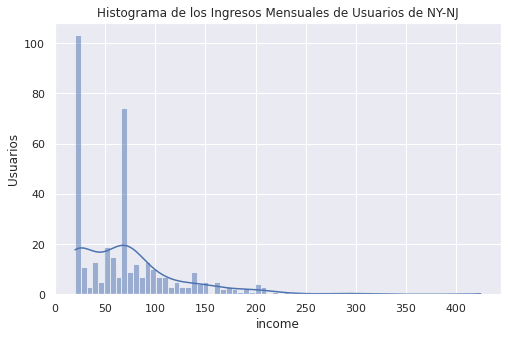

In [92]:
# Monstramos el histograma de ingresos mensuales de los usuarios de NY-NJ

hisplot(df_ny_nj, 'income', 'Histograma de los Ingresos Mensuales de Usuarios de NY-NJ')

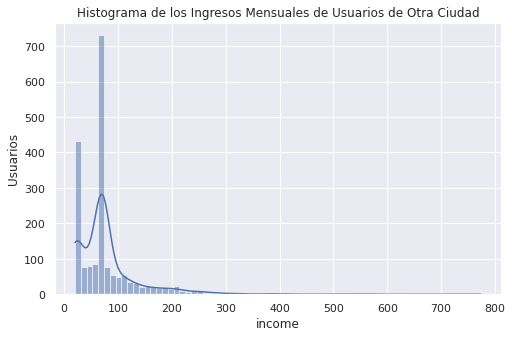

In [93]:
# Monstramos el histograma de ingresos mensuales de los usuarios de otra ciudad

hisplot(df_otra_ciudad, 'income', 'Histograma de los Ingresos Mensuales de Usuarios de Otra Ciudad')


In [94]:
# Calculamos el promedio, la varianza y la desviación estándar de los usuarios de NY-NJ

prom_ny_nj = df_ny_nj['income'].mean()
print('Promedio de los usuarios de NY-NJ:', round(prom_ny_nj,2))

var_ny_nj = np.var(df_ny_nj['income'])
print('Varianza de los usuarios de NY-NJ:', round(var_ny_nj,2))

std_ny_nj = np.sqrt(var_ny_nj)
print('Desviación Estándar de los usuarios de NY-NJ:', round(std_ny_nj,2))

Promedio de los usuarios de NY-NJ: 71.93
Varianza de los usuarios de NY-NJ: 2995.52
Desviación Estándar de los usuarios de NY-NJ: 54.73


In [95]:
# Calculamos el promedio, la varianza y la desviación estándar de los usuarios de otras ciudades

prom_otra_ciudad = df_otra_ciudad['income'].mean()
print('Promedio de Usuarios de Otra Ciudad:', round(prom_otra_ciudad,2))

var_otra_ciudad = np.var(df_otra_ciudad['income'])
print('Varianza de Usuarios de Otra Ciudad:', round(var_otra_ciudad,2))

std_otra_ciudad = np.sqrt(var_otra_ciudad)
print('Desviación Estándar de Usuarios de Otra Ciudad:', round(std_otra_ciudad,2))

Promedio de Usuarios de Otra Ciudad: 77.18
Varianza de Usuarios de Otra Ciudad: 3855.58
Desviación Estándar de Usuarios de Otra Ciudad: 62.09


H0: El ingreso promedio de los usuarios del área NY-NJ no difiere de la de los usuarios de otras regiones.

H1: El ingreso promedio de los usuarios del área NY-NJ difiere de los usuarios de otras regiones.

Valor alfa = 0.05

Para determinar si las muestras tienen la misma varianza, volvemos a aplicar el test de Levene.

In [96]:
# Determinamos si las dos muestras tienen varianzas iguales

city_levene = st.levene(df_ny_nj['income'], df_otra_ciudad['income'])

city_levene

LeveneResult(statistic=1.4688438207890362, pvalue=0.2256531783324219)

Como el p-value en el estudio de las ciudades es superior a 0.05, entonces utilizaremos equal_var = True

In [97]:
# Probamos las hipótesis

alpha = 0.05

results = st.ttest_ind(df_ny_nj['income'], df_otra_ciudad['income'], equal_var = True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la Hipótesis Nula')
else:
    print('No Rechazamos la Hipótesis Nula')

p-value: 0.12664963085199876
No Rechazamos la Hipótesis Nula


## Conclusión general

Se realizaron varios procesos para determinar lo siguiente:

1. Preprocesamiento de datos

Nos conseguimos con cinco dataframes, de las cuales el único que no se modifico fue Plan, debido a que era informativo. Los demás dataframes fueron modificados en algunas columnas con formato object para ser datetime, debido a un mejor estudio. Asimismo, tuvimos un conjunto de usuarios, siendo 500.

2. Transformación de datos

En los dataframes de llamadas, mensajes e internet, creamos nuevas columnas como año, mes y año-mes para estudiar mucho mejor los consumos de los usuarios. Asimismo, creamos una nueva columna llamada ingreso para efectos de estadisticas usando funciones con condiciones dadas por la compañía.

3. Visualización y análisis

Podemos comentar que al estudiar las llamadas de los usuarios por cada plan, nos arroja información diferente. Con la información que se nos da, los usuarios del plan Ultimate envían más mensajes que los usuarios del plan Surf.

Por otro lado, los usuarios no se consumen en la totalidad el paquete de mensajes, lo cual suponemos que prefieren usar otro sistema de mensajería basado en datos.

Con respecto al consumo de Internet, los usuarios del plan Ultimate están un poco por encima que los usuarios del plan Surf.

Por último, con respecto a los ingresos, los usuarios del plan Surf aportan más que los usuarios del plan Ultimate.

4. Probando la hipótesis

Podemos comentar que al probar las hipótesis determinamos que los ingresos promedios del plan Surf y del plan Ultimate no son los mismos. Se puede visualizar porque los usuarios del plan surf pagan de más debido a que se exceden en el consumo de lo que le provee el plan.

También, observamos que los usuarios de NY-NJ y de otras ciudades tienen una renta media similar. 

Con respecto al presupuesto publicitario, recomendamos:

a. No hay necesidad de cambiar el presupuesto publicitario por ciudad con los datos enviados.
b. Enfocarse en la publicidad del paquete Surf, y en vista de que hay varios usuarios que se exceden en los consumos, crear un nuevo paquete entre el Surf y el Ultimate. 
c. Ya que el plan Surf es el más vendido, proponemos enfocar una propuesta publicitaria atractiva al paquete Ultimate.
